In [10]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Import the dataset using Pandas from the above mentioned url

df = pd.read_csv("covid-data.csv")

df.head()
































,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [11]:
# 2a. Find no. of rows & columns in the dataset
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])


Number of rows:  57394
Number of columns:  49


In [12]:
# 2b. Data types of columns
print("Data types of columns:\n", df.dtypes)


Data types of columns:
 iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu

In [13]:
# 2c. Info & describe of data in dataframe
print("Info of dataframe:\n", df.info())
print("Describe of dataframe:\n", df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [14]:
# 3a. Find count of unique values in location column
print("Count of unique values in location column:", df["location"].nunique())


Count of unique values in location column: 216


In [15]:
# 3b. Find which continent has maximum frequency using values counts
print("Continent with maximum frequency: ", df["continent"].value_counts().idxmax())


Continent with maximum frequency:  Europe


In [16]:
# 3c. Find maximum & mean value in 'total_cases'
print("Maximum value in 'total_cases': ", df["total_cases"].max())
print("Mean value in 'total_cases': ", df["total_cases"].mean())


Maximum value in 'total_cases':  55154651.0
Mean value in 'total_cases':  167797.3688753302


In [17]:
# 3d. Find 25%, 50% & 75% quartile value in 'total_deaths'
print("25% quartile value in 'total_deaths': ", df["total_deaths"].quantile(0.25))
print("50% quartile value in 'total_deaths': ", df["total_deaths"].quantile(0.50))
print("75% quartile value in 'total_deaths': ", df["total_deaths"].quantile(0.75))


25% quartile value in 'total_deaths':  13.0
50% quartile value in 'total_deaths':  84.0
75% quartile value in 'total_deaths':  727.0


In [18]:
# 3e. Find which continent has maximum 'human_development_index'
print("Continent with maximum 'human_development_index': ", df.groupby("continent")["human_development_index"].max().idxmax())


Continent with maximum 'human_development_index':  Europe


In [19]:
# 3f. Find which continent has minimum 'gdp_per_capita'
print("Continent with minimum 'gdp_per_capita': ", df.groupby("continent")["gdp_per_capita"].min().idxmin())


Continent with minimum 'gdp_per_capita':  Africa


In [23]:
# 4. Filter the dataframe with only these columns
df = df[['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']]
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


In [24]:
# 5a. Remove all duplicate observations
df.drop_duplicates(inplace=True)
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


In [25]:
# 5b. Find missing values in all columns
print("Missing values:\n", df.isna().sum())

Missing values:
 continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64


In [27]:
# 5c. Remove all observations where continent column value is missing
df.dropna(subset=["continent"], inplace=True)
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


In [29]:

# 5d. Fill all missing values with 0
df.fillna(0, inplace=True)
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


In [31]:
# 6a. Convert date column in datetime format using pandas.to_datetime
df["date"] = pd.to_datetime(df["date"])
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,2020-11-13,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,2020-11-14,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,2020-11-15,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,2020-11-16,8786.0,257.0,1899.775,0.535


In [33]:
# 6b. Create new column month after extracting month data from date column
df["month"] = df["date"].dt.month
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498,12
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498,1
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498,2
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498,3
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498,4
...,...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,2020-11-13,8696.0,255.0,1899.775,0.535,11
56744,Africa,Zimbabwe,2020-11-14,8765.0,257.0,1899.775,0.535,11
56745,Africa,Zimbabwe,2020-11-15,8786.0,257.0,1899.775,0.535,11
56746,Africa,Zimbabwe,2020-11-16,8786.0,257.0,1899.775,0.535,11


In [ ]:
# 7a. Find max value in all columns using groupby function on 'continent' column
df_groupby = df.groupby("continent").max().reset_index()

In [ ]:
# 8a. Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'
df_groupby["total_deaths_to_total_cases"] = df_groupby["total_deaths"] / df_groupby["total_cases"]

In [ ]:
# 9a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot
sns.displot(df["gdp_per_capita"])


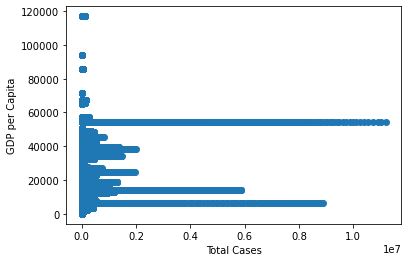

In [4]:
# 9b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'
plt.scatter(df["total_cases"], df["gdp_per_capita"])
plt.xlabel("Total Cases")
plt.ylabel("GDP per Capita")
plt.show()


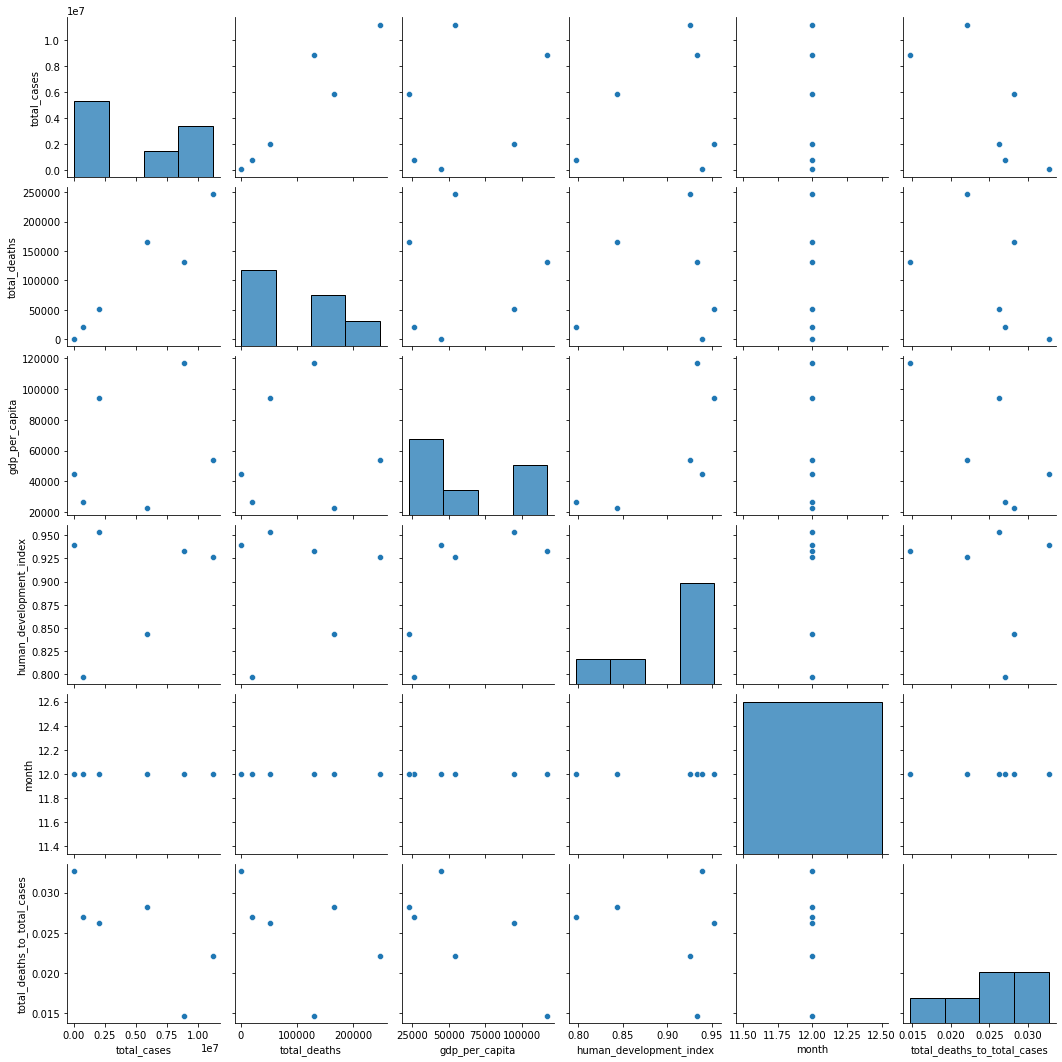

In [5]:
# 9c. Plot Pairplot on df_groupby dataset
sns.pairplot(df_groupby)
plt.show()

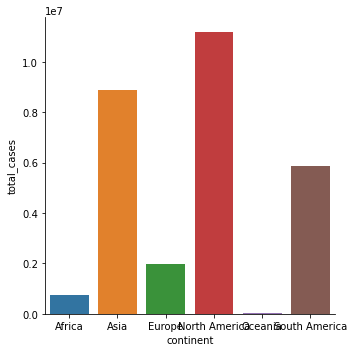

In [6]:
# 9d. Plot a bar plot of 'continent' column with 'total_cases'
sns.catplot(x="continent", y="total_cases", data=df_groupby, kind="bar")
plt.show()

In [9]:
# 10. Save the df_groupby dataframe in your local drive using pandas.to_csv function
df_groupby.to_csv("df_groupby.csv", index=False)

